**Project:** Sentiment Analysis of [Amazon Product Reviews](https://www.kaggle.com/datasets/arhamrumi/amazon-product-reviews)

**Author:** [Giuseppe Muschetta](https://github.com/peppe212)

**Python version:** 3.8

## DATA UNDERSTANDING AND EXPLORATION

In [1]:
# Sopprimiamo i warnings
import warnings
warnings.filterwarnings('ignore')

# Gestione dei Path
from pathlib import Path

# Importiamo le librerie necessarie:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Impostazioni dello stile Seaborn in ambiente globale
sns.set(
    style='whitegrid',
    palette='pastel',
    context='notebook',
    font_scale=1.1,
    rc={'lines.linewidth': 2, 'grid.linestyle': '--'}
)

#### Setting Paths

In [2]:
# Caricamento del Dataset originale di Amazon Reviews
INPUT_DATASET_PATH = Path("Dataset/Reviews.csv")
data = pd.read_csv(INPUT_DATASET_PATH)

# Impostazione path per il salvataggio di tutte le immagini della fase di esplorazione
IMAGES_PATH = Path() / "Images" / "Understanding"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_my_image(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    return


# Gestione salvataggio del dataset di output: 'reviews_data_preparation'.csv
OUTPUT_DATASET_PATH = Path() / "Dataset" 
OUTPUT_DATASET_PATH.mkdir(parents=True, exist_ok=True)

def save_my_dataset(dataframe, dataset_name='reviews_data_preparation', dataset_extension="csv"):
    path = OUTPUT_DATASET_PATH / f"{dataset_name}.{dataset_extension}"
    try:
        dataframe.to_csv(path, index=False)
        print(f"Dataset salvato correttamente in: {path}")
    except Exception as e:
        print(f"Si è verificato un errore durante il salvataggio del dataset: {e}")
        raise FileNotFoundError
#end_function

### Loading the dataset

In [3]:
data.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


### Getting the most important information about the dataset

In [4]:
# Setto su 'deep' per vedere l'effettiva quantità di RAM utilizzata
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 445.8 MB


In [5]:
# da qui vediamo che in 'Summary' e 'ProfileName' ci sono dei valori Nan
# ovviamente sono due colonne che andranno eliminate, 
# ma gestiamo in pochi attimi il problema dei valori nan per poi tornare 
# subito alla fase di data understanding and exploration

# Controllo se ci sono valori NaN nel dataframe
is_nan_in_dataframe = data.isna()

# Conto i valori NaN per ciascuna colonna nel dataframe
nan_counts = is_nan_in_dataframe.sum()

# Filtro le colonne che hanno almeno un valore NaN per poterle stampare a schermo
columns_with_nan = nan_counts[nan_counts > 0]

print("Colonne con valori NaN e il loro conteggio:")
print(columns_with_nan)

Colonne con valori NaN e il loro conteggio:
ProfileName    26
Summary        27
dtype: int64


In [6]:
# Riempio i valori NaN con la seguente stringa: 'empty_field'
data['ProfileName'].fillna('empty_field', inplace=True)
data['Summary'].fillna('empty_field', inplace=True)

# Verifico se ci sono ancora valori NaN nel dataframe
# Applicare due volte any() serve per far restituire un unico booleano
# rispettando la semantica dei predicati
if data.isna().any().any():
    print("Ci sono ancora valori NaN nel DataFrame.")
else:
    print("Non ci sono più valori NaN nel DataFrame.")

Non ci sono più valori NaN nel DataFrame.


In [7]:
data.describe()
# da cui si nota subito come il dataset sia totalmente sbilanciato 
# su recensioni molto positive, il che non ci sorprende

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


### DISTRIBUTION OF RATINGS IN REVIEWS

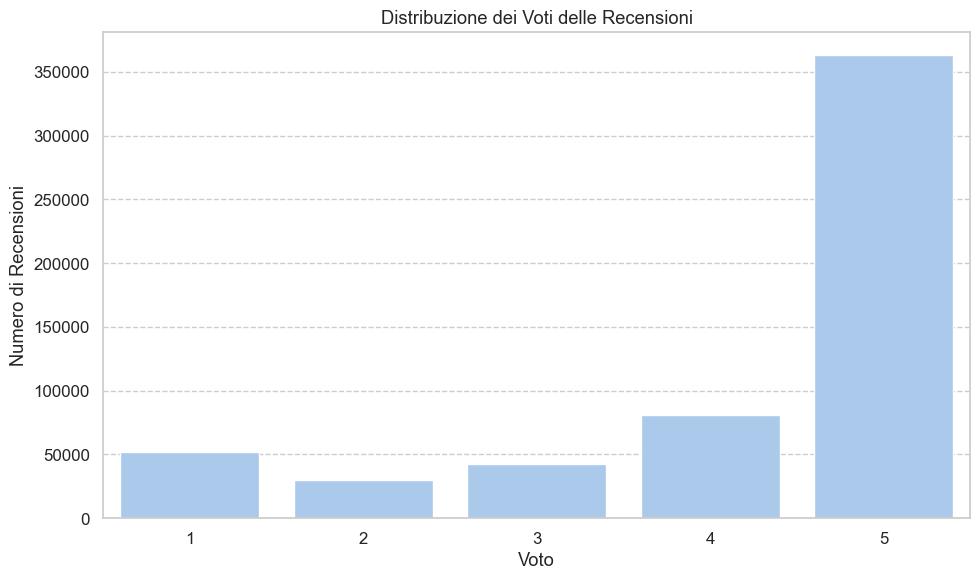

In [8]:
# VEDIAMO COME SI DISTRIBUISCONO I VOTI DELLE RECENSIONI

# Visualizzazione dei dati categorici tramite
# ISTOGRAMMA con libreria ad alto livello Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='Score', data=data)
plt.title('Distribuzione dei Voti delle Recensioni')
plt.xlabel('Voto')
plt.ylabel('Numero di Recensioni')
plt.xticks(range(0, 5), range(1, 6))  
save_my_image("distribuzione_voti")
plt.show()

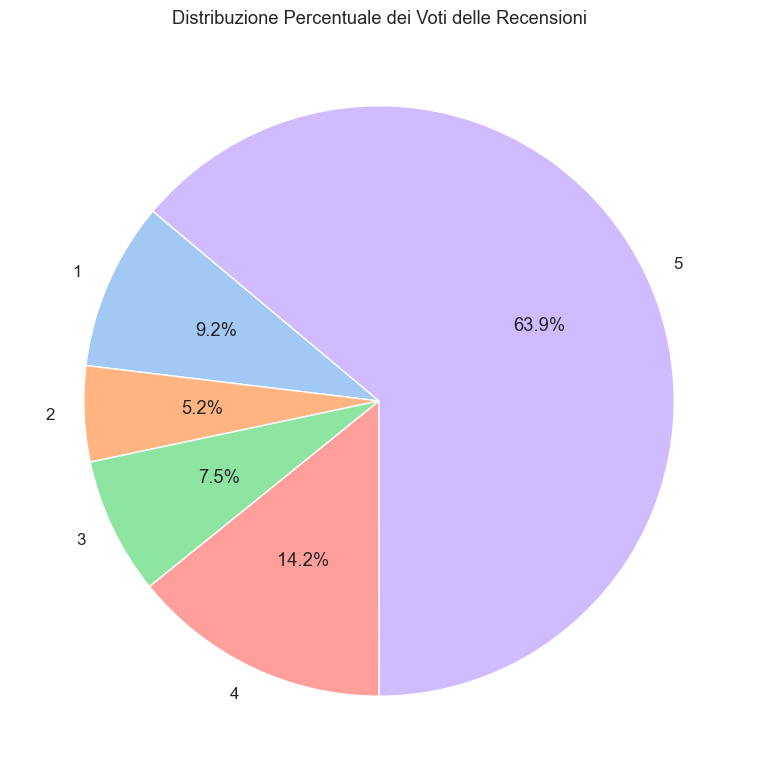

In [9]:
# DISTRIBUZIONE DEI VOTI DELLE RECENSIONI TRAMITE DIAGRTAMMA A TORTA
# Calcolo il conteggio dei voti
vote_counts = data['Score'].value_counts().sort_index()
plt.figure(figsize=(8, 8))
# Creo un diagramma a torta questa volta non posso farlo con Seaborn
plt.pie(vote_counts, labels=vote_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuzione Percentuale dei Voti delle Recensioni')
save_my_image("percentuale_distribuzione_voti")
plt.show()

In [10]:
# INFORMAZIONI TESTUALI:
# Stampo il numero esatto di recensioni per ciascun punteggio
print("Numero di recensioni per voto:")
print(vote_counts.sort_index(ascending=False))
# come è evidente 

Numero di recensioni per voto:
Score
5    363122
4     80655
3     42640
2     29769
1     52268
Name: count, dtype: int64


### DISTRIBUTION OF REVIEW LENGTHS

The average number of characters per review is: 436.22208305333413
The standard deviation of each review is: 445.33974093988763
The average number of words per review is: 80.26402312236347
The standard deviation of words per review is: 79.45538391181482


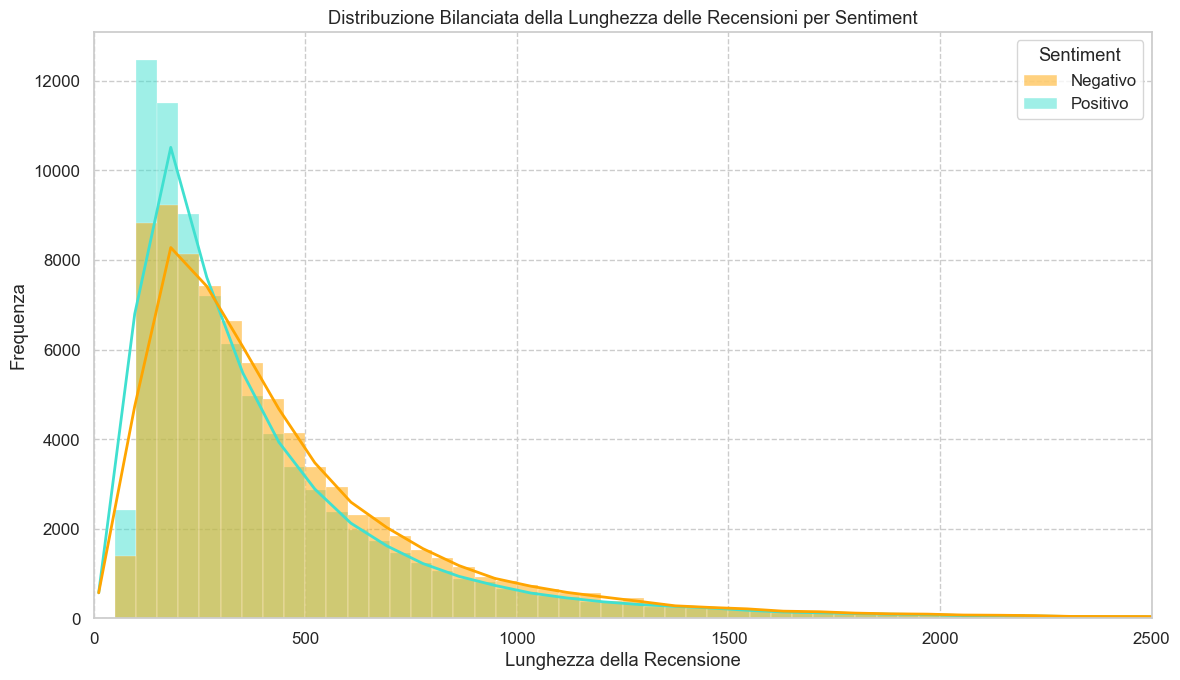

In [17]:
# DISTRIBUZIONE DELLA LUNGHEZZA DELLE RECENSIONI

# Calcolo la lunghezza del testo (misurata in numero di caratteri) per ciascuna recensione
data['review_length'] = data['Text'].apply(len)
average_length = data['review_length'].mean()
std_review_length = data['review_length'].std()
print(f"The average number of characters per review is: {average_length}")
print(f"The standard deviation of each review is: {std_review_length}")

# Calcolo la lunghezza delle recensioni in termini di numero di parole
data['word_count'] = data['Text'].apply(lambda x: len(x.split()))
average_word_count = data['word_count'].mean()
std_word_count = data['word_count'].std()
print(f"The average number of words per review is: {average_word_count}")
print(f"The standard deviation of words per review is: {std_word_count}")

# Creo una copia del DataFrame originale per evitare modifiche
data_copy = data.copy()

# Categorizziamo il sentiment come positivo o negativo, escludendo le recensioni neutre (3 stelle)
data_copy['Sentiment'] = data_copy['Score'].apply(lambda x: 'Positivo' if x > 3 else ('Negativo' if x < 3 else None))
data_copy.dropna(subset=['Sentiment'], inplace=True)

# Calcolo il numero minimo di recensioni per le categorie positivo e negativo
min_count = data_copy['Sentiment'].value_counts().min()

# Creo un DataFrame bilanciato con lo stesso numero di recensioni positive e negative
balanced_data = data_copy.groupby('Sentiment').sample(n=min_count, random_state=42).reset_index(drop=True)

# Imposto il range massimo per la lunghezza delle recensioni da visualizzare
max_x_value = 2500

# Imposto la figura del grafico
plt.figure(figsize=(12, 7))

# Imposto i colori per il grafico
color_palette = {"Negativo": "orange", "Positivo": "turquoise"}

# Grafico della distribuzione delle lunghezze delle recensioni per sentiment positivo e negativo
sns.histplot(data=balanced_data, x='review_length',
             hue='Sentiment',
             bins=50,
             kde=True,
             palette=color_palette,
             binrange=(0, max_x_value))

# Setto il limite sull'asse X per visualizzare meglio le recensioni
plt.xlim(0, max_x_value)

plt.title('Distribuzione Bilanciata della Lunghezza delle Recensioni per Sentiment')
plt.xlabel('Lunghezza della Recensione')
plt.ylabel('Frequenza')
save_my_image("distribuzione_sentiment_review")
plt.show()


In [13]:
data.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,review_length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,263
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,190
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,509
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,219
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,140
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,416
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,304
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,140
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,131
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,137


### EXPLORING UNIQUE PRODUCTS REVIEWED, IDENTIFYING THOSE WITH THE MOST RECEIVED REVIEWS 

Numero di prodotti unici recensiti: 74258
ProductId
B007JFMH8M    913
B0026RQTGE    632
B002QWHJOU    632
B002QWP89S    632
B002QWP8H0    632
Name: count, dtype: int64


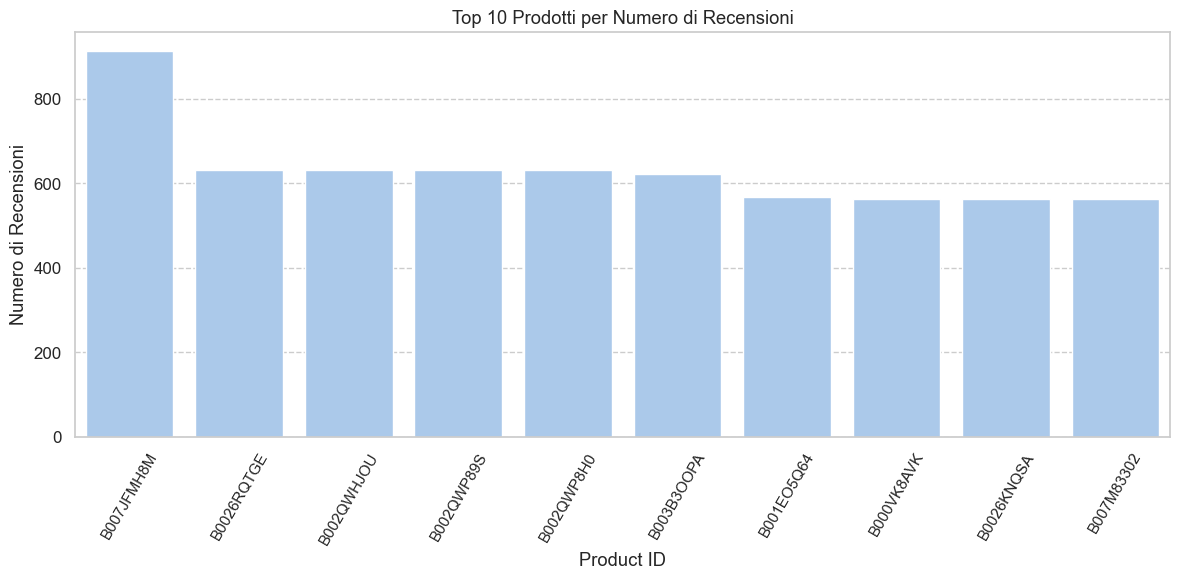

In [12]:
# VISUALIZZIAMO QUANTI PRODOTTI UNICI SONO STATI RECENSITI
# E QUALI SONO I PRODOTTI CHE HANNO RICEVUTO PIU' RECENSIONI
# la cosa importante e che in questo dataset sono stati recensiti 74258 id unici di prodotto

# Trovo i valori unici nella colonna 'ProductId'
unique_products = data['ProductId'].unique()
print("Numero di prodotti unici recensiti:", len(unique_products))

# Conto quante volte ogni prodotto è stato recensito
product_counts = data['ProductId'].value_counts()
print(product_counts.head())  # Stampa i primi 5 prodotti per vedere quelli con più recensioni

# Preparo i dati per Seaborn
# Converto il conteggio in DataFrame
product_counts_df = product_counts.reset_index()
product_counts_df.columns = ['ProductId', 'Counts']

# Visualizzo i top 10 prodotti per numero di recensioni usando Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='ProductId', y='Counts', data=product_counts_df.head(10))
# Riduco la dimensione del carattere per le etichette sull'asse x
# Vario l'angolo delle etichette, ora setto a 60 gradi
plt.xticks(rotation=60, fontsize=11)  
plt.title('Top 10 Prodotti per Numero di Recensioni')
plt.xlabel('Product ID')
plt.ylabel('Numero di Recensioni')
save_my_image("distribuzione_prodotti_recensiti")
plt.show()


### HAVE WOMEN OR MEN REVIEWED MORE?

Gender
unknown          343880
female           110736
male              86463
mostly_female     14810
mostly_male        8253
andy               4312
Name: count, dtype: int64


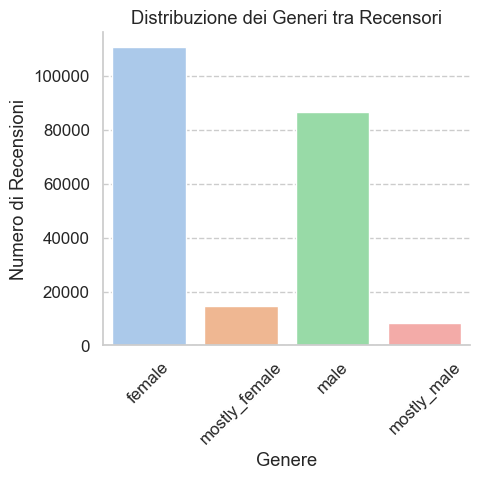

In [13]:
# DISTRIBUZIONE RECENSORI PER GENERE
# VEDIAMO SE A RECENSIRE SONO STATE DI PIU' LE DONNE O GLI UOMINI
import gender_guesser.detector as gender

# Inizializzo il gender detector
d = gender.Detector()

# Funzione per ottenere il genere basato sul nome del profilo
def get_gender_from_profile(profile_name):
    """
    Determina il genere di una persona dal suo nome del profilo.
    
    @args:
    profile_name (str): Il nome del profilo dell'utente da cui si vuole dedurre il genere.
    
    @returns:
    str: Restituisce il genere dedotto ('male', 'female', 'andy' per androgino, ecc.) 
         o 'unknown' se il nome del profilo non è valido o non è una stringa.
    """
    
    # Controlla se il nome del profilo è non-null e se è una stringa
    if pd.notna(profile_name) and isinstance(profile_name, str):
        # Estrae il primo nome dal nome del profilo
        first_name = profile_name.split(' ')[0]
        # Restituisce il genere che ha tentato di decifrare...
        return d.get_gender(first_name)
    else:
        # Se il nome del profilo non è valido o non è una stringa, restituisce 'unknown'
        return 'unknown'

# Applico la funzione alla colonna ProfileName
data['Gender'] = data['ProfileName'].apply(get_gender_from_profile)

# Conto il numero di generi riconosciuti
gender_counts = data['Gender'].value_counts()

print(gender_counts)
# da cui notiamo che la maggior parte non sono stati riconosciuti, mentre se sommiamo
# i female e mostly female con male e mostly male notiamo una leggera prevalenza di donne
# oppure che una leggera prevalenza di donne si sia firmata con il proprio nome o con un 
# nick-name che suggerisce chiaramente il genere.

# PLOTTIAMO GLI ISTOGRAMI RELATIVI A FEMALE, MOSTLY FEMALE, MALE, MOSTLY MALE
# Filtro le categorie menzionate sopra
categories_of_interest = ['female', 'mostly_female', 'male', 'mostly_male']
filtered_data = data[data['Gender'].isin(categories_of_interest)]

# Creo un istogramma per visualizzare la distribuzione dei generi
sns.catplot(x='Gender', kind='count', 
            data=filtered_data, 
            order=categories_of_interest, 
            palette='pastel')

# Imposto titoli ed etichette
plt.title('Distribuzione dei Generi tra Recensori')
plt.xlabel('Genere')
plt.ylabel('Numero di Recensioni')
plt.xticks(rotation=45)  
save_my_image("distribuzione_recensioni_genere")
plt.show()


### EXPLORING THE UNIX TIMESTAMP

In [14]:
# Il timestamp rappresenta il numero totale di secondi trascorsi da un punto specifico nel tempo 
# (l'epoca Unix, che è il 1° gennaio 1970)
# CONVERTIAMO IN ANNI MESI E GIORNI

# Creo una nuova colonna date_time
data['date_time'] = pd.to_datetime(data['Time'], unit='s')

# Tiro fuori anno, mese e giorno e li colloco in colonne separate 
data['Year'] = data['date_time'].dt.year
data['Month'] = data['date_time'].dt.month
data['Day'] = data['date_time'].dt.day


In [15]:
# ANALIZZIAMO L'INTERVALLO TEMPORALE:
min_year = data['date_time'].dt.year.min()
max_year = data['date_time'].dt.year.max()
print(f"L'intervallo temporale va dall'anno {min_year} all'anno {max_year}.")
# ottimo, quindi abbiamo tutte le recensioni che vanno dal 1999 al 2012

L'intervallo temporale va dall'anno 1999 all'anno 2012.


### LET'S SEE HOW THE NUMBER OF REVIEWS HAS CHANGED OVER TIME

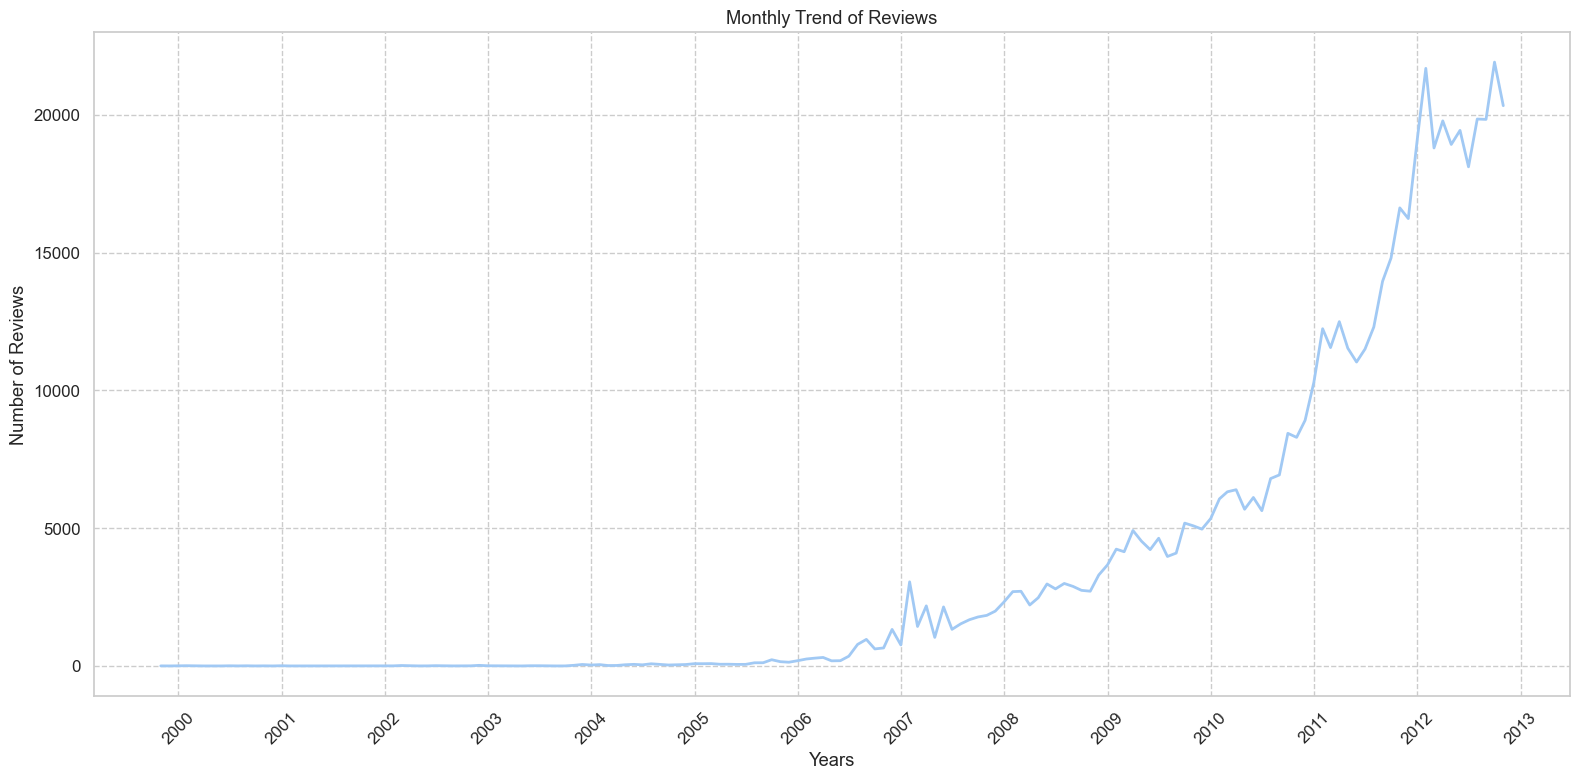

In [16]:
# TREND DELLE RECENSIONI NEL TEMPO:

# Calcolo il numero di recensioni per ogni mese
reviews_trend = data.resample('M', on='date_time')['ProductId'].count()

# Grafico del trend
plt.figure(figsize=(16, 8))  # Puoi aumentare la larghezza se necessario

# Con Seaborn posso plottare direttamente l'indice come asse X e i valori come asse Y
sns.lineplot(x=reviews_trend.index, y=reviews_trend.values)

# Formatto l'asse x per visualizzare ogni anno
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.title('Monthly Trend of Reviews')
plt.xlabel('Years')
plt.ylabel('Number of Reviews')
save_my_image("trend_monthly_number_reviews")
plt.show()

### DISTRIBUTION OF REVIEWS BY DAY OF THE WEEK

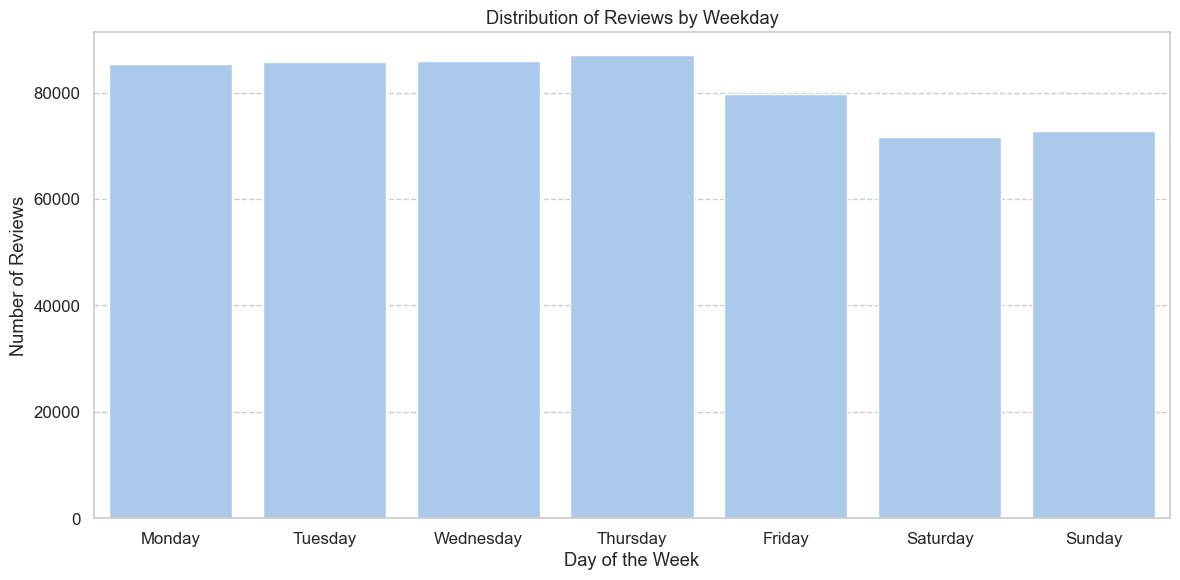

In [17]:
# DISTRIBUZIONE DELLE RECENSIONI IN BASE AL GIORNO DELLA SETTIMANA
data['Weekday'] = data['date_time'].dt.day_name()

# Ordino i giorni della settimana
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_distribution = data['Weekday'].value_counts().reindex(ordered_days)

# Plotto il grafico usando Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=weekday_distribution.index, y=weekday_distribution.values)
plt.title('Distribution of Reviews by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Reviews')
save_my_image("distribution_of_weekly_number_reviews")
plt.show()

# ANALYSIS OF POSITIVE AND NEGATIVE REVIEWS

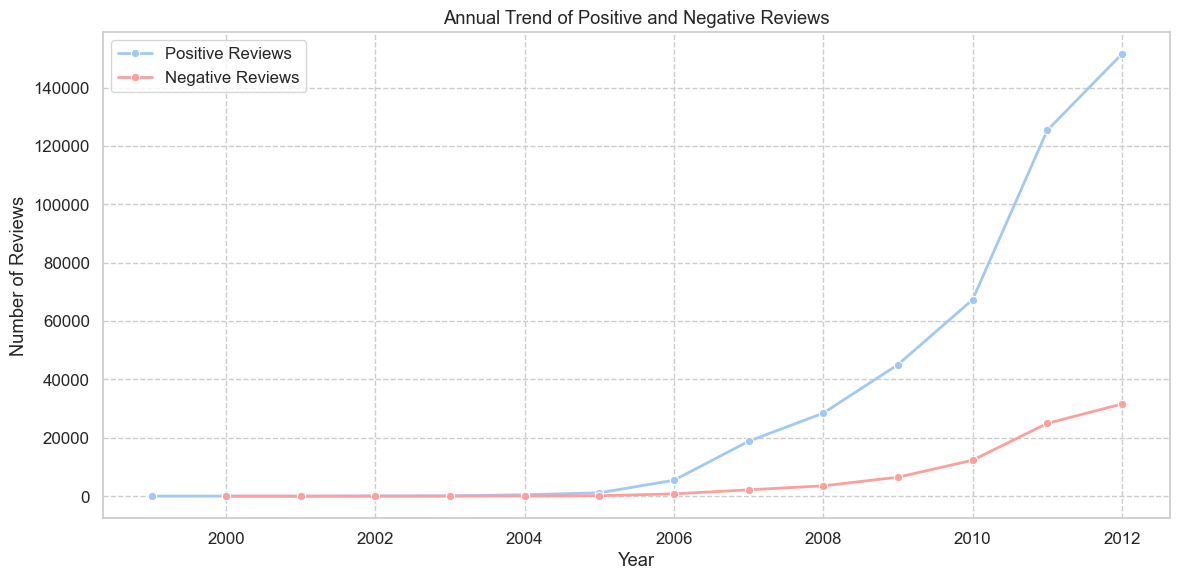

In [18]:
# ANALISI DELLE RECENSIONI POSITIVE E NEGATIVE
# Considero solo le recensioni positive e negative
positive_reviews = data[data['Score'] > 3]
negative_reviews = data[data['Score'] < 3]

# Grafico del trend annuale delle recensioni positive
positive_trend = positive_reviews.resample('Y', on='date_time').size()
negative_trend = negative_reviews.resample('Y', on='date_time').size()

# Convertiamo gli indici di positive_trend e negative_trend (che sono Timestamp) in anni per il plot
positive_trend.index = positive_trend.index.year
negative_trend.index = negative_trend.index.year

# Grafico del trend
# Utilizzo sempre Seaborn, semplicemente perché non ne posso fare a meno!
plt.figure(figsize=(12, 6))
sns.lineplot(data=positive_trend, marker='o', label='Positive Reviews')
sns.lineplot(data=negative_trend, marker='o', color='r', label='Negative Reviews')
plt.title('Annual Trend of Positive and Negative Reviews')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.legend()
save_my_image("trend_annual_positive_negative_reviews.png")
plt.show()

In [19]:
# Mi preparo a salvare un dataset contenente solo ciò che conta
data = data[['Score', 'Text']]

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Score   568454 non-null  int64 
 1   Text    568454 non-null  object
dtypes: int64(1), object(1)
memory usage: 8.7+ MB


In [20]:
# Salvo il dataset che verrà caricato nella fase di Data Preparation
save_my_dataset(data)

Dataset salvato correttamente in: Dataset/reviews_data_preparation.csv
